In [3]:
# Title: Titanic- Machine Learning Through Disaster 
# Objective: Prediction of Survival on the Titanic 
# Model 1: Using a Simple Model based on Gender only

# Imports

# pandas, numpy
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# csv, matplotlib, seaborn
import csv
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:
# For .read_csv, we always use header=0 when we know row 0 is the header row
df = pd.read_csv('Desktop/titanic/train.csv', header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
# Type of object: 
type(df)

pandas.core.frame.DataFrame

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
# Data Types interpreted by Pandas csv reader
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# Filter out columns whose data type is an object
df.dtypes[df.dtypes.map(lambda x: x=='object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [9]:
# Displays the first few data frames (By default, 5 rows)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Displays the last few data frames (By default, 5 rows)
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [11]:
# Mathematical Description of Data Frame (in terms of count, mean, etc.)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# Display the first 10 rows of the Age column
df['Age'][0:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [13]:
#Type of Age object
type(df['Age'])

pandas.core.series.Series

In [14]:
# Mean Value for the Age Column
df['Age'].mean()

29.69911764705882

In [15]:
# Selection of subsets of the dataframe
df[ ['Sex', 'Pclass', 'Age'] ].head()

,Sex,Pclass,Age
0,male,3,22.0
1,female,1,38.0
2,female,3,26.0
3,female,1,35.0
4,male,3,35.0


In [16]:
# Filtering out passengers with Age > 60
df[df['Age'] > 60].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S


In [17]:
# Combination of above two scripts
df[df['Age'] > 60][['Sex', 'Pclass', 'Age', 'Survived']].head()

,Sex,Pclass,Age,Survived
33,male,2,66.0,0
54,male,1,65.0,0
96,male,1,71.0,0
116,male,3,70.5,0
170,male,1,61.0,0


In [18]:
# Passengers whose age is unavailable
df[df['Age'].isnull()][['Sex', 'Pclass', 'Age']].head()

,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN


In [19]:
# Use inside loop for condition checking
for i in range(1,4):
    print i, len(df[ (df['Sex'] == 'male') & (df['Pclass'] == i) ])

1 122
2 108
3 347


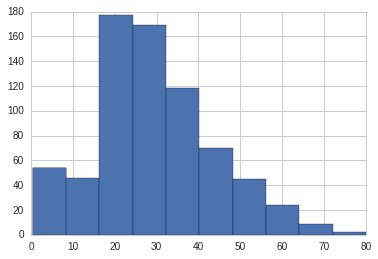

In [20]:
# Visualizing data as a histogram
import pylab as P
df['Age'].hist()
P.show()

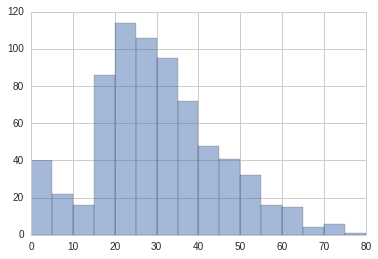

In [21]:
# Mentioning the Age group size and other necessary constraints
df['Age'].dropna().hist(bins=16, range = (0,80), alpha = 0.5)
P.show()

In [22]:
# Adding a new Column named Gender to the Dataframe
# lambda x is an built-in function of python for generating an anonymous function in the moment, at runtime.
df['Gender'] = df['Sex'].map( lambda x: x[0].upper() )
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,F
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,F
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,F
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,M


In [23]:
# Overwriting the Gender column with binary values
df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [24]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [25]:
df['Embarked'] = df['Embarked'].fillna('T')
df['Port'] = df['Embarked'].map({'S':1,'C':2,'Q':3,'T':0}).astype(int)
df[df['Port'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Port
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,T,0,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,T,0,0


In [26]:
df['Embarked'].unique()

array(['S', 'C', 'Q', 'T'], dtype=object)

In [27]:
# Creating a new table of dimension (gender * class)
median_ages = np.zeros((2,3))
median_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [28]:
# Computing the median of ages separately for each specific gender and class 
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = df[(df['Gender'] == i) & (df['Pclass'] == j+1)]['Age'].dropna().median()
median_ages

array([[ 35. ,  28. ,  21.5],
       [ 40. ,  30. ,  25. ]])

In [29]:
# To make changes to the Age Column, we create a new one,modify in accordance with the existing data and delete the former
df['AgeFill'] = df['Age']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Port,AgeFill
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,2,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,35.0


In [30]:

df[ df['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,NaN
17,1,2,NaN,NaN
19,0,3,NaN,NaN
26,1,3,NaN,NaN
28,0,3,NaN,NaN
29,1,3,NaN,NaN
31,0,1,NaN,NaN
32,0,3,NaN,NaN
36,1,3,NaN,NaN
42,1,3,NaN,NaN


In [31]:
# Replacing Nans in AgeFill column by the median values of table in accordance with the passenger's class and gender
for i in range(0, 2):
    for j in range(0, 3):
        df.loc[ (df.Age.isnull()) & (df.Gender == i) & (df.Pclass == j+1),'AgeFill'] = median_ages[i,j]
df[ df['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,25.0
17,1,2,NaN,30.0
19,0,3,NaN,21.5
26,1,3,NaN,25.0
28,0,3,NaN,21.5
29,1,3,NaN,25.0
31,0,1,NaN,35.0
32,0,3,NaN,21.5
36,1,3,NaN,25.0
42,1,3,NaN,25.0


In [32]:
# AgeIsNull column holds binary value based on whether the Age for a particular passenger is available or not
df['AgeIsNull'] = pd.isnull(df.Age).astype(int)
df[['Gender','Pclass','Age','AgeFill','AgeIsNull']].head(10)

,Gender,Pclass,Age,AgeFill,AgeIsNull
0,1,3,22.0,22.0,0
1,0,1,38.0,38.0,0
2,0,3,26.0,26.0,0
3,0,1,35.0,35.0,0
4,1,3,35.0,35.0,0
5,1,3,NaN,25.0,1
6,1,1,54.0,54.0,0
7,1,3,2.0,2.0,0
8,0,3,27.0,27.0,0
9,0,2,14.0,14.0,0


In [33]:
# Feature Engineering usage
df['FamilySize'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Port,AgeFill,AgeIsNull,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,22.0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,2,38.0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,26.0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1,35.0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,35.0,0,0


In [34]:
# Creating a combination of 2 columns
df['Age*Class'] = df.AgeFill * df.Pclass
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Port,AgeFill,AgeIsNull,FamilySize,Age*Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,22.0,0,1,66.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,2,38.0,0,1,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,26.0,0,0,78.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1,35.0,0,1,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,35.0,0,0,105.0


In [35]:
# Dropping columns not in use
df = df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1) 
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Port,AgeFill,AgeIsNull,FamilySize,Age*Class
0,1,0,3,22.0,1,0,7.2500,1,1,22.0,0,1,66.0
1,2,1,1,38.0,1,0,71.2833,0,2,38.0,0,1,38.0
2,3,1,3,26.0,0,0,7.9250,0,1,26.0,0,0,78.0
3,4,1,1,35.0,1,0,53.1000,0,1,35.0,0,1,35.0
4,5,0,3,35.0,0,0,8.0500,1,1,35.0,0,0,105.0


In [36]:
# Removing Entire Age Column 
df = df.drop(['Age'], axis=1)
#Alternatively for removing columns still having Nans, use :- df = df.dropna()
df = df.dropna()
df.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Gender,Port,AgeFill,AgeIsNull,FamilySize,Age*Class
0,1,0,3,1,0,7.2500,1,1,22.0,0,1,66.0
1,2,1,1,1,0,71.2833,0,2,38.0,0,1,38.0
2,3,1,3,0,0,7.9250,0,1,26.0,0,0,78.0
3,4,1,1,1,0,53.1000,0,1,35.0,0,1,35.0
4,5,0,3,0,0,8.0500,1,1,35.0,0,0,105.0


In [37]:
# Converting the dataframe to a numpy array for usage
train_data = df.values
train_data

array([[   1. ,    0. ,    3. , ...,    0. ,    1. ,   66. ],
       [   2. ,    1. ,    1. , ...,    0. ,    1. ,   38. ],
       [   3. ,    1. ,    3. , ...,    0. ,    0. ,   78. ],
       ..., 
       [ 889. ,    0. ,    3. , ...,    1. ,    3. ,   64.5],
       [ 890. ,    1. ,    1. , ...,    0. ,    0. ,   26. ],
       [ 891. ,    0. ,    3. , ...,    0. ,    0. ,   96. ]])

In [38]:
#Comparing to the old data,
training_file = open('Desktop/titanic/train.csv','rb')
training_data = csv.reader(training_file)
header = training_data.next()

data=[]
for row in training_data:
    data.append(row)
data = np.array(data)
print data

[['1' '0' '3' ..., '7.25' '' 'S']
 ['2' '1' '1' ..., '71.2833' 'C85' 'C']
 ['3' '1' '3' ..., '7.925' '' 'S']
 ..., 
 ['889' '0' '3' ..., '23.45' '' 'S']
 ['890' '1' '1' ..., '30' 'C148' 'C']
 ['891' '0' '3' ..., '7.75' '' 'Q']]


In [39]:
#Changing the test data
df_test = pd.read_csv('Desktop/titanic/test.csv')
df_test.info()
df_test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [40]:
# Adding a Gender Column
df_test['Gender'] = df_test['Sex'].map({'male':1,'female':0}).astype(int)
df_test['Gender'].head()

0    1
1    0
2    1
3    1
4    0
Name: Gender, dtype: int64

In [41]:
# Filling up the Age using the median age method
median = np.zeros((2,3))
for i in xrange(2):
    for j in xrange(3):
        median[i,j] = df_test[(df_test['Gender'] == i) & (df_test['Pclass'] == j+1)]['Age'].dropna().median() 
print median

[[ 41.  24.  22.]
 [ 42.  28.  24.]]


In [42]:
df_test['AgeisNull'] = pd.isnull(df_test['Age']).astype(int)
df_test['AgeisNull'].head()

0    0
1    0
2    0
3    0
4    0
Name: AgeisNull, dtype: int64

In [43]:
#Using the above found median ages to fill in the null ages in the data
for i in xrange(2):
    for j in xrange(3):
        df_test.loc[(df_test['Gender'] == i) & (df_test['Pclass'] == j + 1) & df_test['Age'].isnull(),'Age'] = median[i,j]
pd.isnull(df_test['Age']).head()

0    False
1    False
2    False
3    False
4    False
Name: Age, dtype: bool

In [44]:
df_test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [45]:
df_test['Port'] = df_test['Embarked'].map({'S':1,'C':2,'Q':3}).astype(int)

In [46]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Gender         418 non-null int64
AgeisNull      418 non-null int64
Port           418 non-null int64
dtypes: float64(2), int64(7), object(5)
memory usage: 45.8+ KB


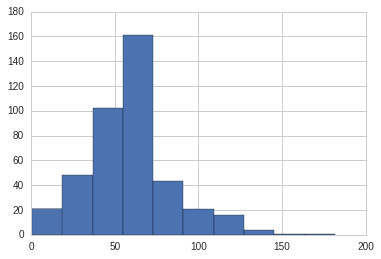

In [47]:
# Adding New Features as we added in the training data
df_test['AgeFill'] = df_test['Age']
df_test['FamilySize'] = df_test['Parch'] + df_test['SibSp']
df_test['Age*Class'] = df_test['Age']*df_test['Pclass']
df_test['Age*Class'].hist()
plt.show()
# Adding mean value in the missing fares
df_test.loc[df_test['Fare'].isnull(),'Fare'] = df_test['Fare'].mean()


In [48]:
df_test = df_test.drop(['Name','Sex','Ticket','Embarked','Cabin'],axis = 1)
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender,AgeisNull,Port,AgeFill,FamilySize,Age*Class
0,892,3,34.5,0,0,7.8292,1,0,3,34.5,0,103.5
1,893,3,47.0,1,0,7.0000,0,0,1,47.0,1,141.0
2,894,2,62.0,0,0,9.6875,1,0,3,62.0,0,124.0
3,895,3,27.0,0,0,8.6625,1,0,1,27.0,0,81.0
4,896,3,22.0,1,1,12.2875,0,0,1,22.0,2,66.0


In [49]:
test_data = df_test.values
print np.shape(test_data)
test_data = test_data[:,1:]
print test_data

(418, 12)
[[   3.    34.5    0.  ...,   34.5    0.   103.5]
 [   3.    47.     1.  ...,   47.     1.   141. ]
 [   2.    62.     0.  ...,   62.     0.   124. ]
 ..., 
 [   3.    38.5    0.  ...,   38.5    0.   115.5]
 [   3.    24.     0.  ...,   24.     0.    72. ]
 [   3.    24.     1.  ...,   24.     2.    72. ]]


In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
forest = RandomForestClassifier(n_estimators = 100)
print np.shape(train_data)

(891, 12)


In [52]:
forest = forest.fit(train_data[0::,1::],train_data[0::,0])

In [53]:
output = forest.predict(test_data)
print output,len(output)

[ 108.   62.  445.  445.   62.  221.   62.   62.  368.   62.  108.   62.
   62.   62.   62.   62.  445.  108.   62.   62.   62.   62.  778.  752.
   62.   62.   62.  108.   62.   49.   62.   62.   62.  889.   62.  108.
  778.   62.  445.  644.   62.  166.  108.   62.   62.  108.   62.  108.
   62.   62.   62.   62.   62.   89.  445.   62.  108.  108.  640.   62.
  108.   62.  108.   62.   62.  778.   62.   62.   62.   89.   62.  108.
   62.   62.   62.   62.  445.  331.   62.   62.  349.   62.   62.  108.
  445.  640.   62.   62.  142.  341.  432.  108.   62.  445.   62.  108.
   62.  108.   62.  445.   62.   62.  108.  108.   62.   62.  108.  108.
  445.   62.  445.  555.   62.  368.   62.   62.  108.   62.   62.  432.
  778.  108.   62.  108.  108.   62.  108.  331.  445.  445.  445.   62.
  534.  108.  108.  108.  108.   62.   62.  679.  234.   62.   62.   62.
   62.   86.  644.   62.  166.   62.   62.  108.   62.   62.  262.  108.
   62.   62.   62.  534.  142.  349.   62.  108.  4

In [54]:
# Using Keras Library to Predict data
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential

In [55]:
# Seperating the data and the labels
X = train_data[:500,1:]
X_cv = train_data[500:,1:]
labels= train_data[:,0]
y = np.zeros((500,2))
y_cv = np.zeros((391,2))

In [56]:
for i in range(500):
    if(labels[i] == 1):
        y[i][1] = 1
    else:
        y[i][0] = 1
for i in range(391):
    if(labels[500 + i] == 1):
        y_cv[i][1] = 1
    else:
        y_cv[i][0] = 1

In [57]:
model = Sequential([
        Dense(32,input_dim=11),
        Activation('sigmoid'),
        Dropout(0.25),
        Dense(32),
        Activation('sigmoid'),
        Dropout(0.25),
        Dense(32),
        Activation('sigmoid'),
        Dropout(0.25),
        Dense(2),
        Activation('sigmoid'),
    ])

In [58]:
model.compile(optimizer = 'adadelta',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [63]:
model.fit(X,y,nb_epoch = 500,batch_size = 32,verbose = 0)

In [64]:
score = model.evaluate(X_cv,y_cv,batch_size = 32, verbose = 0)
print score

[0.00082918573596664816, 1.0]


In [65]:
yPred = model.predict_classes(test_data,verbose = 1)

418/418 [==============================] - 0s     


In [66]:
print yPred

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


In [67]:
file_handle = open('output_keras.csv',"w")
prediction_handle = csv.writer(file_handle)
prediction_handle.writerow(['PassengerId','Survived'])
i = 892
for pred in yPred:
    prediction_handle.writerow([i,int(pred)])
    i += 1
file_handle.close()
